# Chapter 11: Shrinkage Methods

Load the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 7

'%.7f'

Read in the data:

In [2]:
fat = pd.read_csv("data/fat.csv")
fat.head()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Principal Components Analysis

Some plots of the data:

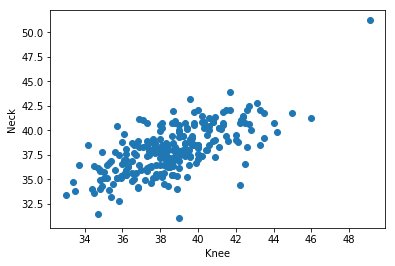

In [3]:
plt.scatter(fat.knee, fat.neck)
plt.xlabel("Knee")
plt.ylabel("Neck")
plt.show()

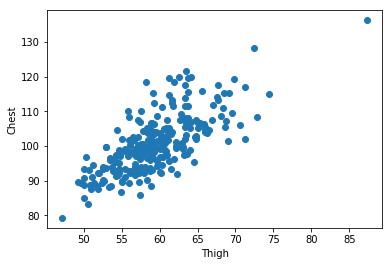

In [4]:
plt.scatter(fat.thigh, fat.chest)
plt.xlabel("Thigh")
plt.ylabel("Chest")
plt.show()

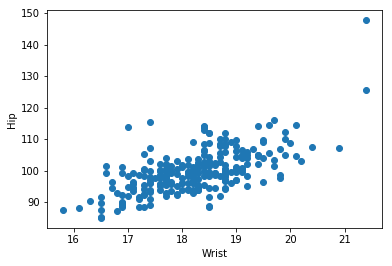

In [5]:
plt.scatter(fat.wrist, fat.hip)
plt.xlabel("Wrist")
plt.ylabel("Hip")
plt.show()



Consider only the circumference measurements:

In [6]:
cfat = fat.iloc[:,8:]
cfat.head()

,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Get PCA from `sklearn`

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(cfat)

/anaconda/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

SDs of the principal components

In [8]:
np.sqrt(pca.explained_variance_)

array([15.9902105,  4.0658424,  2.9659647,  2.0004442,  1.6940811,
        1.4988076,  1.3032232,  1.2547797,  1.109552 ,  0.527372 ])

Proportion of explained variance

In [9]:
pca.explained_variance_ratio_

array([0.8669847, 0.0560537, 0.0298287, 0.0135693, 0.0097313, 0.0076172,
       0.0057589, 0.0053387, 0.0041744, 0.0009431])

In [10]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 86.7 ,  92.31,  95.29,  96.65,  97.62,  98.38,  98.96,  99.49,
        99.91, 100.  ])

Get the rotation matrix

In [11]:
rot = pca.components_
rot.shape

(10, 10)

Rows are the loadings. Here is the first:

In [12]:
rot[0,:]

array([0.1224786, 0.5016164, 0.6580829, 0.4195671, 0.2796875, 0.1214856,
       0.0559626, 0.1454063, 0.0739148, 0.039348 ])

Redo with scaled data

In [13]:
from sklearn.preprocessing import scale
scalfat = pd.DataFrame(scale(cfat))
scalfat.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578


In [14]:
pcac = PCA()
pcac.fit(scalfat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
np.sqrt(pcac.explained_variance_)

array([2.6550681, 0.8547028, 0.8207202, 0.7025369, 0.5481656, 0.5293576,
       0.4528597, 0.4061987, 0.278819 , 0.2535215])

In [16]:
pcac.explained_variance_ratio_

array([0.7021413, 0.0727618, 0.0670909, 0.04916  , 0.0299293, 0.0279108,
       0.0204268, 0.0164343, 0.0077432, 0.0064018])

In [17]:
np.cumsum(np.round(pcac.explained_variance_ratio_, decimals=4)*100)

array([70.21, 77.49, 84.2 , 89.12, 92.11, 94.9 , 96.94, 98.58, 99.35,
       99.99])

PC1 is mostly a weighted average

In [18]:
rotc = pcac.components_
rotc[0,:]

array([0.3272162, 0.338517 , 0.3341249, 0.3477307, 0.3327963, 0.3288933,
       0.246596 , 0.3221654, 0.2701136, 0.298821 ])

In [19]:
rotc[1,:]

array([-0.0027708, -0.2732976, -0.398488 , -0.2546432, -0.1914145,
        0.0216185,  0.624646 ,  0.021591 ,  0.362762 ,  0.3772439])

Do robust mean and covariance estimation. Not the same as R but similar.

In [20]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope()
ee.fit(cfat)

/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [21]:
ee.location_

array([37.7665072, 99.6650718, 90.9971292, 98.9607656, 58.8684211,
       38.3784689, 22.9090909, 32.0301435, 28.6133971, 18.1641148])

In [22]:
ee.covariance_.shape

(10, 10)

Not exactly the same result as R but close.

Compute and plot the Mahalanobis distances:

In [23]:
from scipy.spatial.distance import mahalanobis
Vi = np.linalg.inv(ee.covariance_)
md = cfat.apply(lambda x: (mahalanobis(x, ee.location_, Vi)), axis=1)
md.head()


0    2.286084
1    2.766669
2    3.904474
3    2.787264
4    5.249232
dtype: float64

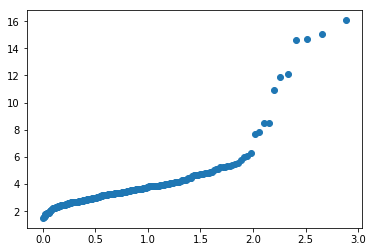

In [24]:
import scipy as sp
n=len(md)
ix = np.arange(1,n+1)
halfq = sp.stats.norm.ppf((n+ix)/(2*n+1)),
plt.scatter(halfq, np.sort(md))
plt.show()

Do the principal components regression. First do the OLS regression on the scaled predictors:

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
xmat = sm.add_constant(cfat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     66.87
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           8.61e-64
Time:                        10:24:44   Log-Likelihood:                -705.75
No. Observations:                 252   AIC:                             1433.
Df Residuals:                     241   BIC:                             1472.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2287      6.214      1.163      0.246      -5.013      19.470
neck          -0.5819      0.209     -2.790      0.006      -0.993      -0.171
chest         -0.0908      0.085     -1.063      0.289      -0.259       0.077
abdom          0.9602      0.072     13.414      0.000       0.819       1.101
hip           -0.3914      0.113     -3.473      0.001      -0.613      -0.169
thigh          0.1337      0.125      1.070      0.286      -0.112       0.380
knee          -0.0941      0.212     -0.443      0.658      -0.512       0.324
ankle          0.0042      0.203      0.021      0.983      -0.396       0.404
biceps         0.1112      0.159      0.699      0.485      -0.202       0.425
forearm        0.3445      0.186      1.857      0.064      -0.021       0.710
wrist         -1.3535      0.471     -2.871      0.004      -2.282      -0.425
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.407
Skew:                           0.102   Prob(JB):                        0.300
Kurtosis:                       2.567   Cond. No.                     4.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now use only the first 2 principal components:

In [26]:
pcscores = pca.fit_transform(scale(cfat))
pcscores[:6,:2]

array([[-1.981955 , -0.4096865],
       [-0.9226158,  0.7726571],
       [-2.0916847, -0.6154022],
       [-0.2424826,  0.1234552],
       [ 0.2600856, -0.3912457],
       [ 2.7822092,  0.8457063]])

In [27]:
xmat = sm.add_constant(pcscores[:,:2])
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           8.27e-44
Time:                        10:24:44   Log-Likelihood:                -772.72
No. Observations:                 252   AIC:                             1551.
Df Residuals:                     249   BIC:                             1562.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9385      0.329     57.542      0.000      18.290      19.587
x1             1.8383      0.124     14.800      0.000       1.594       2.083
x2            -3.5435      0.386     -9.184      0.000      -4.303      -2.784
==============================================================================
Omnibus:                        4.795   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                5.463
Skew:                           0.165   Prob(JB):                       0.0651
Kurtosis:                       3.641   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
cfat.columns

Index(['neck', 'chest', 'abdom', 'hip', 'thigh', 'knee', 'ankle', 'biceps',
       'forearm', 'wrist'],
      dtype='object')

Use a simplified model using only abdomen and ankle:

In [29]:
xmat = pd.concat([scalfat.iloc[:,2], scalfat.iloc[:,6] - scalfat.iloc[:,2]],axis=1)
xmat = sm.add_constant(xmat)
lmod = sm.OLS(fat.brozek, xmat).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     258.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           1.56e-61
Time:                        10:24:44   Log-Likelihood:                -731.42
No. Observations:                 252   AIC:                             1469.
Df Residuals:                     249   BIC:                             1479.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9385      0.279     67.789      0.000      18.388      19.489
2              5.7514      0.328     17.548      0.000       5.106       6.397
0             -0.9931      0.313     -3.169      0.002      -1.610      -0.376
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.386
Skew:                           0.030   Prob(JB):                        0.824
Kurtosis:                       3.182   Cond. No.                         1.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Read in the meat spectrometer data:

In [30]:
meatspec = pd.read_csv("data/meatspec.csv",index_col=0)
meatspec.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


Regression on the training set produces a very good fit. Differs slightly from R.

In [31]:
trainmeat = meatspec.iloc[:172,]
testmeat = meatspec.iloc[173:,]
modlm = sm.OLS(trainmeat.fat, sm.add_constant(trainmeat.iloc[:,:-1])).fit()
modlm.rsquared

0.997019603596392

Set up an RMSE function

In [32]:
def rmse(x,y):
    return np.sqrt(np.mean((x-y)**2))

RMSE on the training data:

In [33]:
rmse(modlm.fittedvalues, trainmeat.fat)

0.6903167162185964

RMSE on the test data:

In [34]:
testpv = modlm.predict(sm.add_constant(testmeat.iloc[:,:-1]))
rmse(testpv, testmeat.fat)

3.8590675571853943

Do some feature selection first. No need to scale since variables are commensurate. This is not the same as AIC-based selection with `step` in R. This method takes the largest coefficients.

In [35]:
from sklearn.feature_selection import RFECV
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
X = trainmeat.drop('fat',axis=1)
reg.fit(X, trainmeat.fat)
selector = RFECV(reg, step=1, cv=10)
selector = selector.fit(X, trainmeat.fat)
selector.ranking_

array([ 1,  1, 46,  1,  1,  1,  1,  1, 69, 49, 16, 50, 35,  6,  1, 33,  1,
       67, 42, 56,  1,  1,  1, 21,  1, 24, 43, 17, 13, 30, 36, 34, 55, 31,
       51, 52, 53, 81, 10, 23,  9,  7,  8, 27, 28, 26, 77, 54, 66, 37, 38,
       41, 40, 82, 44, 63, 73, 70, 62, 61, 60, 45, 15, 14, 32, 59, 75, 48,
       47, 57, 74, 22,  1,  1, 78, 76, 29, 12, 11,  1,  1, 25, 18,  1,  1,
       64,  5, 65, 79, 72, 71, 19, 20, 68, 58,  4,  3,  2, 39, 80])

Only a small number of predictors are selected:

In [36]:
Xmat = X.iloc[:,selector.support_]
Xmat.shape

(172, 19)

In [37]:
modsteplm = sm.OLS(trainmeat.fat, sm.add_constant(Xmat)).fit()
rmse(modsteplm.fittedvalues, trainmeat.fat)

2.7454516486884253

Result on the test set is much better than before.

In [38]:
Xmatest = testmeat.drop('fat',axis=1)
testpv = modsteplm.predict(sm.add_constant(Xmatest.iloc[:,selector.support_]))
rmse(testpv, testmeat.fat)

2.519178540795178

### Principal Components on spectrometer data

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
sd10 = np.sqrt(pca.explained_variance_).round(2)[:10]
sd10

array([5.06, 0.51, 0.28, 0.17, 0.04, 0.02, 0.01, 0.01, 0.  , 0.  ])

In [41]:
pcscores = pca.fit_transform(X)
pcscores.shape

(172, 100)

Need to invert PC2 because direction is different from R (not a problem - this just happens).

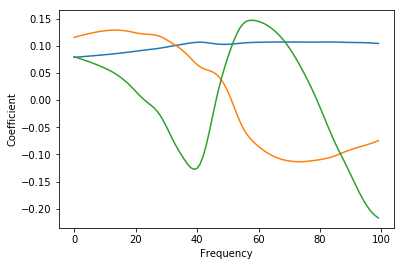

In [42]:
freq = np.arange(0,100)
rotc = pca.components_
plt.plot(freq, rotc[0,:])
plt.plot(freq, -rotc[1,:])
plt.plot(freq, rotc[2,:])
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

In [43]:
pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:4])).fit()
rmse(pcrmod.fittedvalues, trainmeat.fat)

4.064745214417259

Plot the effect of predictors using a linear model

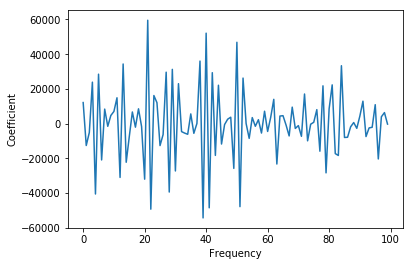

In [44]:
plt.plot(freq,modlm.params[1:])
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

In [45]:
pcrmod.params

const    18.093023
x1        1.198706
x2        3.386954
x3      -27.093717
x4      -40.533933
dtype: float64

Can duplicate

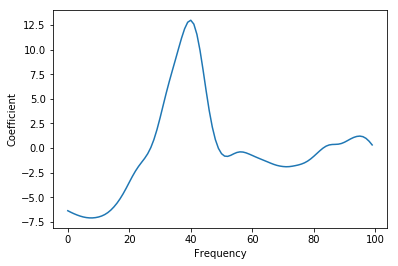

In [46]:
pceff = np.dot(pca.components_[:4,].T, pcrmod.params[1:])
plt.plot(freq, pceff)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

Can do the same thing using the @ operator but the vector needs to be a numpy array.

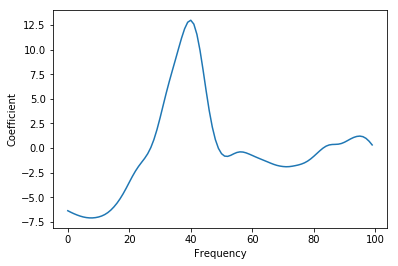

In [47]:
pceff = pca.components_[:4,].T @ np.array(pcrmod.params[1:])
plt.plot(freq, pceff)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

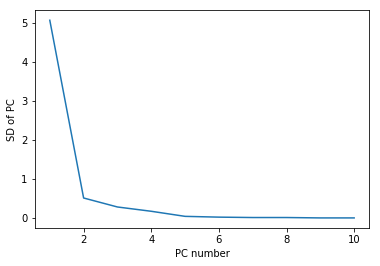

In [48]:
plt.plot(np.arange(1,11), sd10)
plt.xlabel("PC number")
plt.ylabel("SD of PC")
plt.show()

Demonstrate the method by which the design matrix in the PCR is constructed from the original X matrix and the loadings. Note that X needs to be centered.

In [49]:
m = X.mean(axis=0)
Xc = X - m
rotX = Xc @ pca.components_[:4,].T
rotX.iloc[0,:]

0   -2.244544
1    0.221631
2   -0.105484
3    0.042954
Name: 1, dtype: float64

In [50]:
pcscores[0,:4]

array([-2.2445444,  0.2216308, -0.1054843,  0.042954 ])

Now do it for the test data. 

In [51]:
Xtest = testmeat.drop('fat',axis=1)
Xtestc = Xtest - m
rotX = Xtestc @ pca.components_[:4,].T
testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
rmse(testpv, testmeat.fat)

4.52586819692492

In [52]:
ncomp = np.arange(1,51)
rmsep = np.empty(50)
for icomp in ncomp:
    Xtest = testmeat.drop('fat',axis=1)
    Xtestc = Xtest - m
    rotX = Xtestc @ pca.components_[:icomp,].T
    pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:icomp])).fit()
    testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
    rmsep[icomp-1] = rmse(testpv, testmeat.fat)

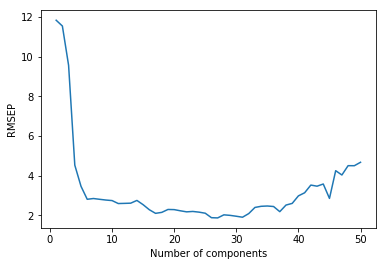

In [53]:
plt.plot(ncomp, rmsep)
plt.ylabel("RMSEP")
plt.xlabel("Number of components")
plt.show()

In [54]:
np.argmin(rmsep)+1

27

Use k-fold crossvalidation. (Unclear how random this is).

In [55]:
from sklearn.model_selection import KFold
nsp = 10
kf = KFold(n_splits=nsp)
rmsep = np.empty(nsp)
y = np.asarray(trainmeat.fat)
ncomp = 50
irmsep = np.empty(ncomp)

In [56]:
for icomp in range(1,ncomp+1):
    Xtrain = sm.add_constant(pcscores[:,:icomp])
    for k, (train, test) in enumerate(kf.split(Xtrain, y)):
        pmod = sm.OLS(y[train], Xtrain[train,:]).fit()
        testpv = pmod.predict(Xtrain[test,:])
        rmsep[k] = rmse(testpv, y[test])
    irmsep[icomp-1] = rmsep.mean()

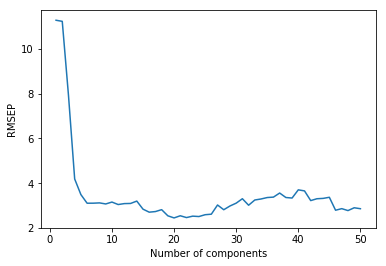

In [57]:
plt.plot(range(1,ncomp+1), irmsep)
plt.ylabel("RMSEP")
plt.xlabel("Number of components")
plt.show()

In [58]:
np.argmin(irmsep)+1

20

Chooses a different number of components than R and gets slightly worse performance

In [59]:
icomp = 20
pcrmod = sm.OLS(trainmeat.fat, sm.add_constant(pcscores[:,:icomp])).fit()
Xtrain = trainmeat.drop('fat',axis=1)
m = Xtrain.mean(axis=0)
Xtest = testmeat.drop('fat',axis=1) - m
rotX = Xtest @ pca.components_[:icomp,].T
testpv = pcrmod.params[0] + np.dot(rotX,pcrmod.params[1:])
rmse(testpv, testmeat.fat)

2.2867438349561002

## Partial Least Squares

The `sklearn` Python package and `pls` R package are not the same so we cannot achieve identical results. This section needs additional work.

Do PLS with 4 components:

In [60]:
Ytrain = trainmeat.fat
ncomp = 4
from sklearn.cross_decomposition import PLSRegression
plsreg = PLSRegression(scale=False,n_components=ncomp)
plsmod = plsreg.fit(Xtrain, Ytrain)
Xtrainr, Ytrainr = plsreg.transform(Xtrain, Ytrain)

Figure out how Ytrainr relates to Ytrain:

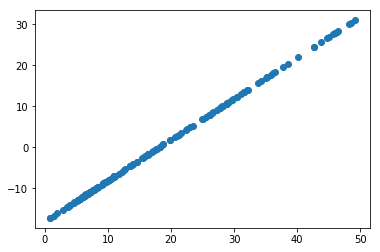

In [61]:
plt.scatter(Ytrain, Ytrainr)
plt.show()

In [62]:
np.mean(Ytrain - Ytrainr)

18.0930233

In [63]:
np.mean(Ytrain)

18.0930233

Can see that Ytrainr is just a mean centered version of Ytrain.

But can check we only have 4 components:

In [64]:
Xtrain.shape

(172, 100)

In [65]:
Xtrainr.shape

(172, 4)

Compare the predicted values from PLS with the observed values:

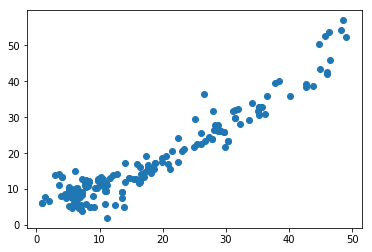

In [66]:
pv = plsmod.predict(Xtrain)
plt.scatter(Ytrain, pv)
plt.show()

Not that good a fit:

In [67]:
rmse(Ytrain,np.squeeze(pv))

3.949666546351611

Now do the comparison for the test set:

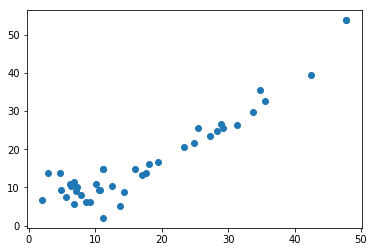

In [68]:
Xtest = testmeat.drop('fat',axis=1)
Ytest = testmeat.fat
pvt = plsmod.predict(Xtest)
plt.scatter(Ytest, pvt)
plt.show()

In [69]:
rmse(np.asarray(Ytest),np.squeeze(pvt))

4.35632004495151

In [70]:
plsmod.x_loadings_.shape

(100, 4)

Plot of the coefficients:

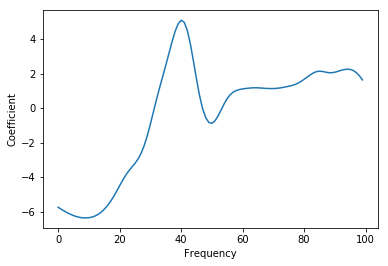

In [71]:
regmod = sm.OLS(trainmeat.fat, sm.add_constant(plsmod.x_scores_)).fit()
pceff = plsmod.x_loadings_ @ np.array(regmod.params[1:])
plt.plot(freq, pceff)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

Compare these to the fitted values:

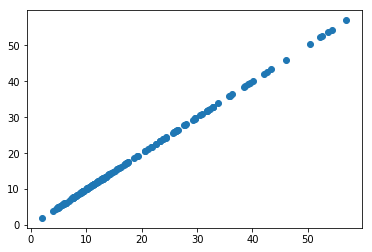

In [72]:
pvt = plsmod.predict(Xtrain)
fv = regmod.fittedvalues
plt.scatter(fv, pvt)
plt.show()

Do some CV to select the number of components:

In [73]:
from sklearn.model_selection import KFold
nsp = 10
kf = KFold(n_splits=nsp)
rmsep = np.empty(nsp)
y = np.asarray(trainmeat.fat)
Xtrain = trainmeat.drop('fat',axis=1)
ncomp = 50
irmsep = np.empty(ncomp)

Not clear if the right thing is being crossvalidated here:

In [74]:
for icomp in range(1,ncomp+1):
    plsreg = PLSRegression(scale=False,n_components=icomp)
    plsmod = plsreg.fit(Xtrain, y)
    Xtraini = sm.add_constant(plsmod.x_scores_)
    for k, (train, test) in enumerate(kf.split(Xtraini, y)):
        pmod = sm.OLS(y[train], Xtraini[train,:]).fit()
        testpv = pmod.predict(Xtraini[test,:])
        rmsep[k] = rmse(testpv, y[test])
    irmsep[icomp-1] = rmsep.mean()

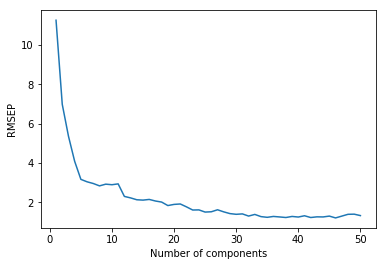

In [75]:
plt.plot(range(1,ncomp+1), irmsep)
plt.ylabel("RMSEP")
plt.xlabel("Number of components")
plt.show()

Would pick a large number of components.

# Ridge regression

Can reproduce the ridge regression plot.

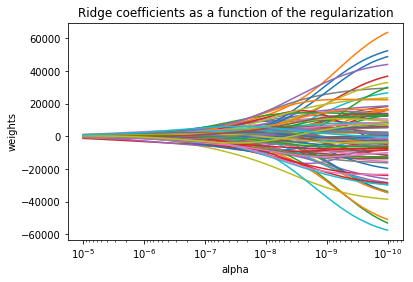

In [76]:
from sklearn import linear_model

n_alphas = 200
alphas = np.logspace(-10, -5, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(Xtrain, y)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Need to do more work to create predictions.

## Lasso regression

Section needs more work.

In [77]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


Use CV to compute R^2 on a grid of alphas.

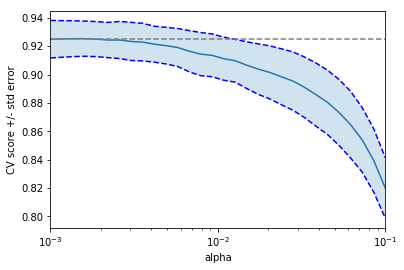

In [78]:
X = trainmeat.drop('fat',axis=1)
y = np.asarray(trainmeat.fat)

lasso = Lasso(random_state=0, max_iter=10000, tol=0.01)
alphas = np.logspace(-3, -1, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

Demonstrates preference for smaller values of alpha. Choose alpha = 0.01 for the reason that this choice is within the 2SD band of the optimum. This will give preference to fewer non-zero coefficients in the Lasso.

In [79]:
lasmod = Lasso(alpha=0.01, max_iter=1e5)
lasmod.fit(X, y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

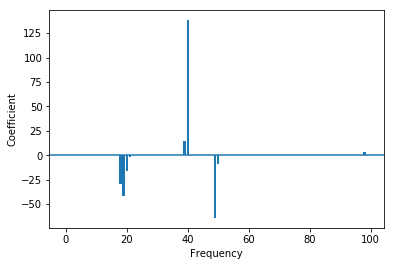

In [80]:
plt.bar(freq,lasmod.coef_)
plt.axhline(0)
plt.xlabel("Frequency")
plt.ylabel("Coefficient")
plt.show()

We see that relatively few coefficients are active. Compute the RMSE on the test set:

In [81]:
Xtest = testmeat.drop('fat',axis=1)
rmse(np.dot(Xtest, lasmod.coef_) + lasmod.intercept_, testmeat.fat)

3.2578304444463084

Not a particularly good result. Use a much smaller alpha:

In [82]:
lasmod = Lasso(alpha=0.0001, max_iter=1e5)
lasmod.fit(X, y)
Xtest = testmeat.drop('fat',axis=1)
rmse(np.dot(Xtest, lasmod.coef_) + lasmod.intercept_, testmeat.fat)

/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2.5778006230060626

This results in a better fit although not as good as previously. Now compute the coefficient traces as alpha changes.

/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

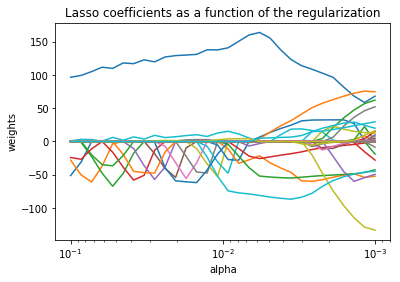

In [83]:
coefs = []
for a in alphas:
    lasmod = Lasso(alpha=a, max_iter=1e5)
    lasmod.fit(X, y)
    coefs.append(lasmod.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Result looks a bit dodgy for large values of alpha. Maybe something is wrong?

In [84]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
